<a href="https://colab.research.google.com/github/Alanoud-10/PROJECT_Data-Mining/blob/main/phase4_Report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#1. Problem
print("Problem\n\nSince health is the most valuable thing a person has, with the help of data mining, we can predict whether a person is likely to have certain diseases and take the right precautions.\n\nPanic attacks significantly impact mental health and quality of life.\nBy analyzing panic attack data, we can identify risk factors and predict susceptibility using data mining techniques, enabling early intervention.")


Problem

Since health is the most valuable thing a person has, with the help of data mining, we can predict whether a person is likely to have certain diseases and take the right precautions.

Panic attacks significantly impact mental health and quality of life.
By analyzing panic attack data, we can identify risk factors and predict susceptibility using data mining techniques, enabling early intervention.


In [ ]:
#2. Data Mining Task
print("Classification Task:\n"
      "• Class Attribute: Panic_Score (discrete values ranging Low, Medium, and High).\n"
      "• Goal: Predict the Panic_Score based on the other attributes.\n"
      "  This is a multi-class classification problem where the aim is to\n"
      "  categorize individuals into one of the panic score levels.\n\n"
      "Clustering Task:\n"
      "• Goal: Group individuals into clusters based on similarities in their features\n"
      "  (e.g., panic attack frequency, heart rate, medical history).\n"
      "  This could help identify subgroups of individuals with similar\n"
      "  panic attack patterns or risk factors.")


Classification Task:
• Class Attribute: Panic_Score (discrete values ranging Low, Medium, and High).
• Goal: Predict the Panic_Score based on the other attributes.
  This is a multi-class classification problem where the aim is to
  categorize individuals into one of the panic score levels.

Clustering Task:
• Goal: Group individuals into clusters based on similarities in their features
  (e.g., panic attack frequency, heart rate, medical history).
  This could help identify subgroups of individuals with similar
  panic attack patterns or risk factors.


Step A: Importing the dataset - Reading from local file...
Path to dataset file: /content/panic_attack_dataset.csv
Dataset loaded successfully.

Step B: Understanding the Dataset
The dataset consists of rows and columns containing various features related to panic attacks.
Rows: 1200, Columns: 21
Column names: ['ID', 'Age', 'Gender', 'Panic_Attack_Frequency', 'Duration_Minutes', 'Trigger', 'Heart_Rate', 'Sweating', 'Shortness_of_Breath', 'Dizziness', 'Chest_Pain', 'Trembling', 'Medical_History', 'Medication', 'Caffeine_Intake', 'Exercise_Frequency', 'Sleep_Hours', 'Alcohol_Consumption', 'Smoking', 'Therapy', 'Panic_Score']

Data Types of Columns:
ID                          int64
Age                         int64
Gender                     object
Panic_Attack_Frequency      int64
Duration_Minutes            int64
Trigger                    object
Heart_Rate                  int64
Sweating                   object
Shortness_of_Breath        object
Dizziness                  object
Chest

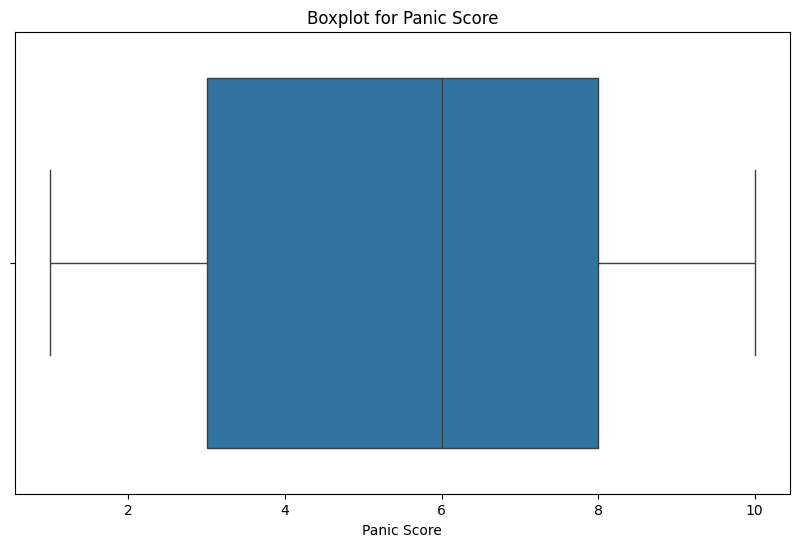


Step E: Data Visualization
Generating plots to understand feature distributions and relationships.

1. Histogram for Panic Score:


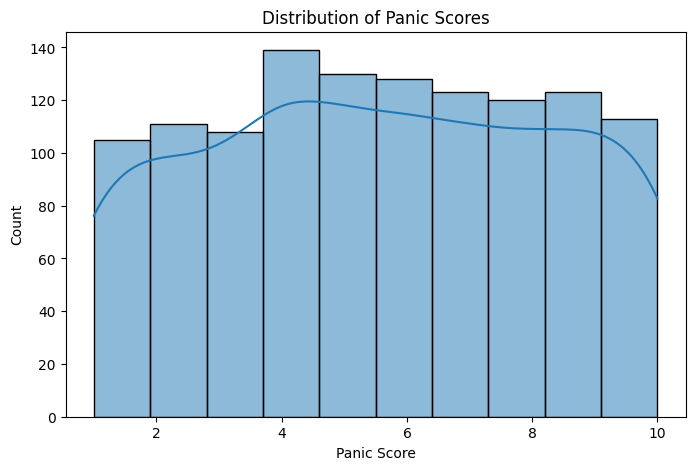

This histogram shows the distribution of panic scores across the dataset. It helps understand the spread of panic scores and whether there are any areas with high concentration or imbalance in scores.

2. Bar Plot for Gender Distribution:


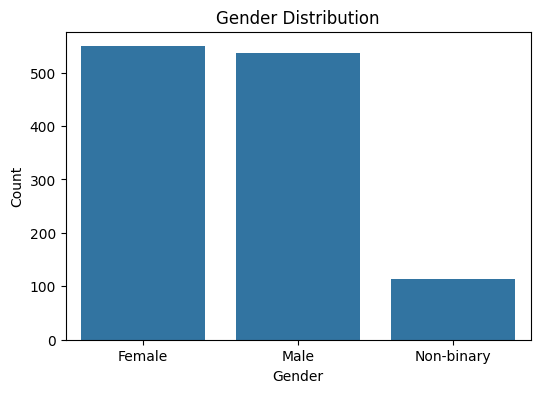

This bar plot shows the distribution of gender in the dataset. It's a nominal variable, and the count plot allows us to see whether the data is balanced between genders.

3. Scatter Plot for Heart Rate vs Panic Score:


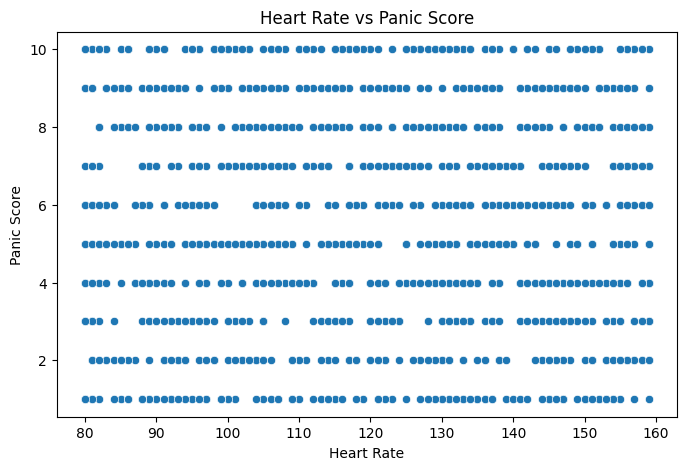

This scatter plot helps visualize the relationship between heart rate and panic score. It can help identify any trends or patterns that might suggest a correlation between these two variables.

Outliers Detection Using Boxplot for Panic Score:


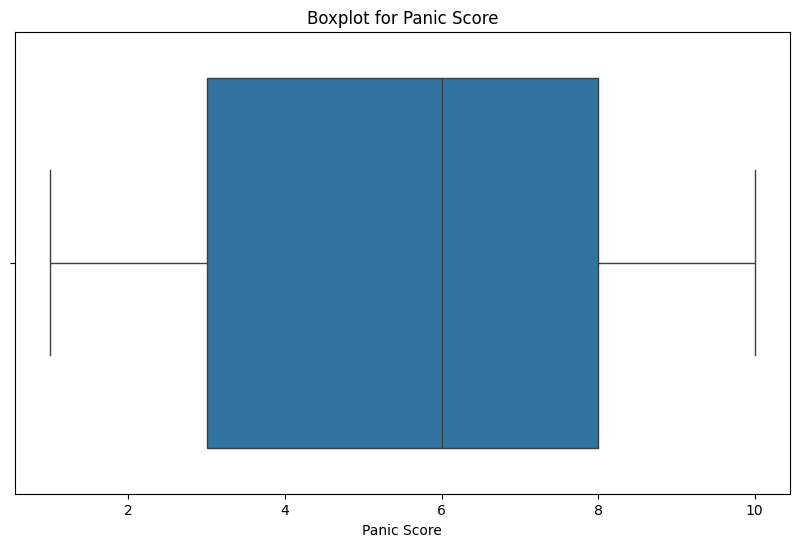

The boxplot for Panic Score helps detect any outliers in the target variable (Panic_Score).

Concluding Observations from the Plots and Data Exploration:
From the above visualizations and statistical summaries, we can observe the following:
- The `Panic_Score` distribution appears to have a few extreme values (outliers), which can skew models if not handled.
- The `Gender` distribution is imbalanced, with a potential need for further investigation into its impact on the results.
- The `Heart_Rate` and `Panic_Score` scatter plot suggests some correlation, and further analysis can confirm its significance.
- There are several potential outliers detected in `Panic_Score` that need to be addressed for better model performance.
Based on these insights, it is clear that data preprocessing steps such as handling outliers, encoding categorical variables, and normalizing values are necessary.


In [ ]:
#3. Data


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step A: Import the dataset
print("Step A: Importing the dataset - Reading from local file...")
dataset_path = '/content/panic_attack_dataset.csv'
print("Path to dataset file:", dataset_path)


def load_dataset():
    try:
        data = pd.read_csv(dataset_path)
        print("Dataset loaded successfully.")
        return data
    except FileNotFoundError:
        print(f"Could not find the dataset at: {dataset_path}. Please check the file name and path.")
        return None

data = load_dataset()

if data is not None:
    # Step B: Dataset Overview
    print("\nStep B: Understanding the Dataset")
    print("The dataset consists of rows and columns containing various features related to panic attacks.")
    print(f"Rows: {data.shape[0]}, Columns: {data.shape[1]}")
    print("Column names:", data.columns.tolist())

    # Data types of the columns
    print("\nData Types of Columns:")
    print(data.dtypes)

    # Missing values
    print("\nMissing Values in Each Column:")
    print(data.isnull().sum())

    # Step C: Statistical Summary (Five-number summary, including outliers)
    print("\nStep C: Statistical Summary")
    print("We calculate statistical measures such as mean, variance, and percentiles to understand data distribution.")
    print(data.describe())

    # Step D: Class Label Distribution (Detect Class Imbalance)
    print("\nStep D: Analyzing Class Distribution")
    print("Checking the distribution of the class label to detect any imbalances in the dataset.")
    print(data['Medical_History'].value_counts())

    # Boxplot for Panic Score (class label) to visualize potential outliers
    print("\nVisualizing Panic Score with a Boxplot:")
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=data['Panic_Score'])
    plt.title('Boxplot for Panic Score')
    plt.xlabel('Panic Score')
    plt.show()

    # Step E: Data Visualization - Variable Distributions
    print("\nStep E: Data Visualization")
    print("Generating plots to understand feature distributions and relationships.")

    # 1. Histogram for Panic Score (numeric attribute)
    print("\n1. Histogram for Panic Score:")
    plt.figure(figsize=(8, 5))
    sns.histplot(data['Panic_Score'], bins=10, kde=True)
    plt.title('Distribution of Panic Scores')
    plt.xlabel('Panic Score')
    plt.ylabel('Count')
    plt.show()
    print("This histogram shows the distribution of panic scores across the dataset. It helps understand the spread of panic scores and whether there are any areas with high concentration or imbalance in scores.")

    # 2. Bar plot for Gender (nominal attribute)
    print("\n2. Bar Plot for Gender Distribution:")
    plt.figure(figsize=(6, 4))
    sns.countplot(x='Gender', data=data)
    plt.title('Gender Distribution')
    plt.xlabel('Gender')
    plt.ylabel('Count')
    plt.show()
    print("This bar plot shows the distribution of gender in the dataset. It's a nominal variable, and the count plot allows us to see whether the data is balanced between genders.")

    # 3. Scatter plot for Heart Rate vs Panic Score (numeric attributes)
    print("\n3. Scatter Plot for Heart Rate vs Panic Score:")
    plt.figure(figsize=(8, 5))
    sns.scatterplot(x=data['Heart_Rate'], y=data['Panic_Score'])
    plt.title('Heart Rate vs Panic Score')
    plt.xlabel('Heart Rate')
    plt.ylabel('Panic Score')
    plt.show()
    print("This scatter plot helps visualize the relationship between heart rate and panic score. It can help identify any trends or patterns that might suggest a correlation between these two variables.")

    print("\nConcluding Observations from the Plots and Data Exploration:")
    print("From the above visualizations and statistical summaries, we can observe the following:")
    print("- The `Panic_Score` distribution appears to have a few extreme values (outliers), which can skew models if not handled.")
    print("- The `Gender` distribution is imbalanced, with a potential need for further investigation into its impact on the results.")
    print("- The `Heart_Rate` and `Panic_Score` scatter plot suggests some correlation, and further analysis can confirm its significance.")
    print("- There are several potential outliers detected in `Panic_Score` that need to be addressed for better model performance.")
    print("Based on these insights, it is clear that data preprocessing steps such as handling outliers, encoding categorical variables, and normalizing values are necessary.")




In [ ]:
#4. Data preprocessing

# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from scipy import stats

# Load the dataset
dataset_path = '/content/panic_attack_dataset.csv'
data = pd.read_csv(dataset_path)

# Initial Explanation on Data Preprocessing
print("Why Apply Data Preprocessing?\n")
print("Data preprocessing is a crucial step in machine learning as it ensures that the dataset is clean, consistent, and ready for model training.")
print("Raw data may contain issues such as missing values, outliers, categorical variables, and features with different scales, all of which can negatively impact the performance of machine learning models.")
print("In our case, the dataset has several potential issues that need preprocessing, including:")
print("- Missing values in numerical and categorical columns")
print("- Outliers that could distort statistical analyses")
print("- Categorical variables that need to be converted into numerical values")
print("- Numerical features that need to be normalized to a consistent scale")

print("\nWe will address these issues using the following techniques:\n")
print("1. Handling Missing Values: To prevent model bias, we will fill missing values in numerical and categorical columns.")
print("2. Outlier Detection & Removal: Outliers can significantly affect model performance, so we will remove rows with outliers using the Z-score method.")
print("3. Categorical Encoding: We will convert categorical variables into numerical values using Label Encoding, which is essential for machine learning algorithms.")
print("4. Normalization (Min-Max Scaling): We will scale numerical features to a range of [0, 1] to ensure that features with different units don't bias the model.")

# Snapshot of raw dataset
print("\nRaw Dataset Snapshot:")
print(data.head(), "\n")

# 1. Handling Missing Values
print("Step 1: Handling Missing Values")
print("We will fill missing values with the median for numerical columns and mode for categorical columns.")
numerical_features = data.select_dtypes(include=['number']).columns.tolist()
categorical_features = data.select_dtypes(include=['object']).columns.tolist()

# Display missing values before handling
print("Missing values before handling:")
print(data.isnull().sum(), "\n")

# Filling missing values for numerical features with the median
data[numerical_features] = data[numerical_features].fillna(data[numerical_features].median())

# Filling missing values for categorical features with the mode
data[categorical_features] = data[categorical_features].fillna(data[categorical_features].mode().iloc[0])

# Display missing values after handling
print("Missing values after handling:")
print(data.isnull().sum(), "\n")

# 2. Outlier Detection & Removal using Z-Score
print("Step 2: Outlier Detection & Removal")
print("We will remove rows with outliers using the Z-score method. Rows where the Z-score exceeds 3 or -3 will be removed.")
# Calculate Z-scores for numerical features
z_scores = stats.zscore(data[numerical_features])

# Remove rows with Z-scores greater than 3 (or less than -3)
data = data[(abs(z_scores) < 3).all(axis=1)]

# Show shape of dataset after removing outliers
print(f"Dataset shape after removing outliers: {data.shape}\n")

# 3. Categorical Encoding using Label Encoding
print("Step 3: Categorical Encoding (Label Encoding)")
print("We will apply Label Encoding to convert categorical columns into numerical values.")
label_encoders = {}
for col in categorical_features:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# Display encoded categorical columns
print("Encoded Categorical Features:\n", data[categorical_features].head(), "\n")

# 4. Normalization (Min-Max Scaling)
print("Step 4: Normalization (Min-Max Scaling)")
print("We will apply Min-Max scaling to normalize the numerical features to a range of [0, 1].")
scaler = MinMaxScaler()
data[numerical_features] = scaler.fit_transform(data[numerical_features])

# Show normalized numerical features
print("Normalized Numerical Features:\n", data[numerical_features].head(), "\n")

# Snapshot of the preprocessed dataset
print("Step 5: Preprocessed Dataset Snapshot")
print(data.head())

# Save the preprocessed dataset
data.to_csv('/content/panic_attack_dataset_preprocessed.csv', index=False)







Why Apply Data Preprocessing?

Data preprocessing is a crucial step in machine learning as it ensures that the dataset is clean, consistent, and ready for model training.
Raw data may contain issues such as missing values, outliers, categorical variables, and features with different scales, all of which can negatively impact the performance of machine learning models.
In our case, the dataset has several potential issues that need preprocessing, including:
- Missing values in numerical and categorical columns
- Outliers that could distort statistical analyses
- Categorical variables that need to be converted into numerical values
- Numerical features that need to be normalized to a consistent scale

We will address these issues using the following techniques:

1. Handling Missing Values: To prevent model bias, we will fill missing values in numerical and categorical columns.
2. Outlier Detection & Removal: Outliers can significantly affect model performance, so we will remove rows with

5. Data Mining Technique – Classification

Why Classification?
Build a classification model to predict the severity of panic attacks (Low, Medium, High) based on individual health and psychological features.
- Enables predictive analysis on new data.
- Helps identify the most influential features.
- Supports healthcare professionals in detecting individuals at risk.

Applied Methodology:
- Used Decision Tree Classifier for its interpretability and ability to handle mixed data types.
- Transformed 'Panic_Score' into categories: Low (0–0.33), Medium (0.34–0.66), High (0.67–1.0).
- Split data into features (X) and target (y), then into training/testing sets.
- Tested different test sizes (20%, 30%, 40%) and split criteria (Gini, Entropy).

Evaluation Metrics:
- Accuracy: Correct predictions over total samples.
- Recall: Sensitivity to actual positive cases.
- Precision: Accuracy of positive predictions.
- Specificity: True negative rate.
- Confusion Matrix and Classification Report used f

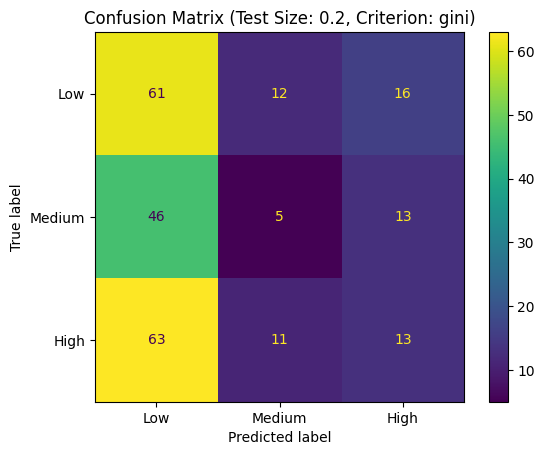

Classification Report:
              precision    recall  f1-score   support

         Low       0.36      0.69      0.47        89
      Medium       0.18      0.08      0.11        64
        High       0.31      0.15      0.20        87

    accuracy                           0.33       240
   macro avg       0.28      0.30      0.26       240
weighted avg       0.29      0.33      0.28       240

Sensitivity (Recall) per class: {'Low': 0.08, 'Medium': 0.15, 'High': 0.69}
Precision per class: {'Low': 0.18, 'Medium': 0.31, 'High': 0.36}
Specificity per class: {'Low': 0.87, 'Medium': 0.81, 'High': 0.28}


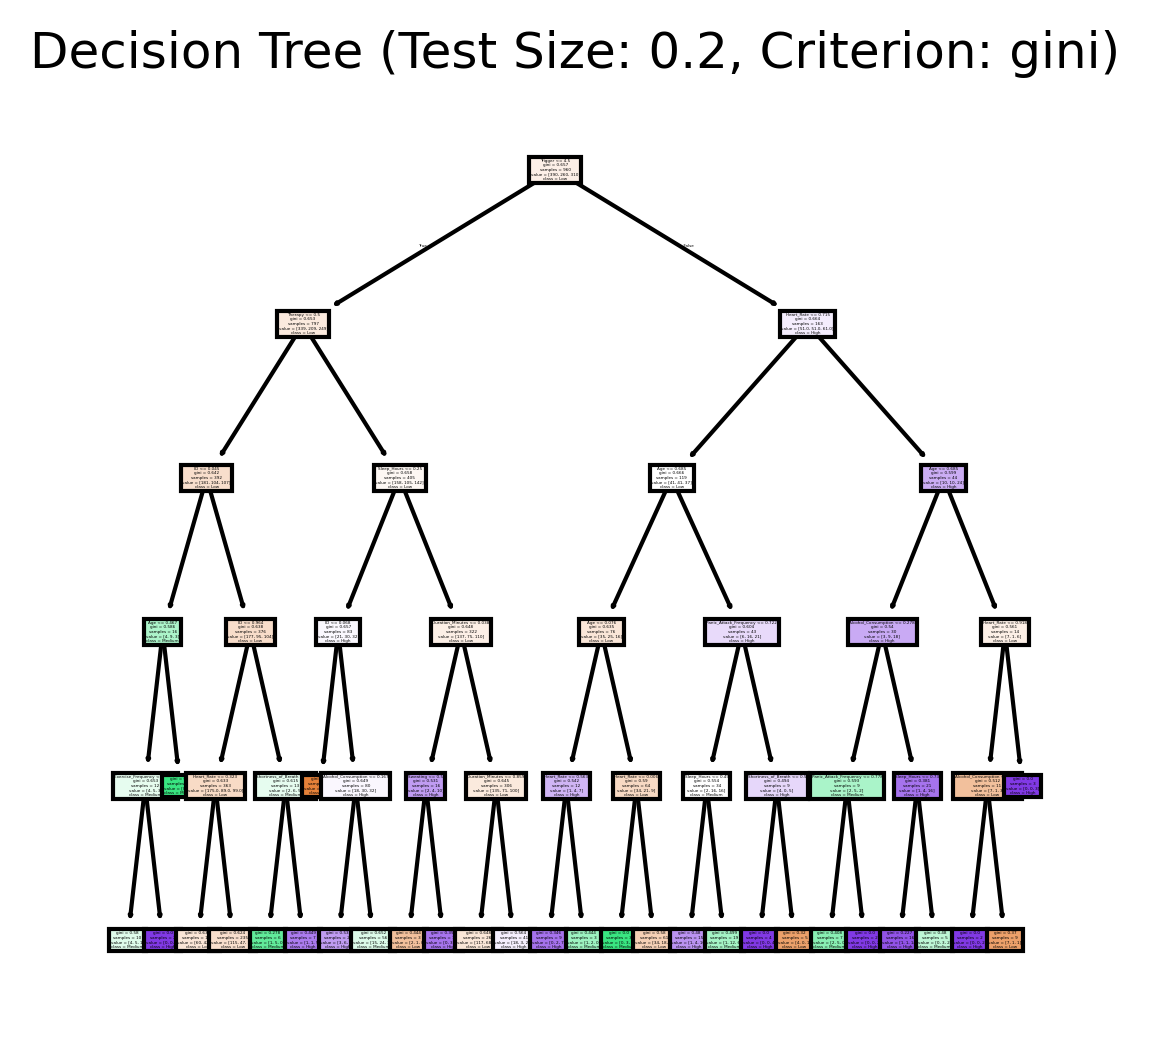

Predictions for test dataset:
 ['Medium' 'High' 'High' 'Low' 'High' 'Medium' 'High' 'Medium' 'High'
 'High' 'Medium' 'High' 'High' 'High' 'High' 'High' 'High' 'Medium'
 'Medium' 'Medium' 'Low' 'High' 'High' 'High' 'High' 'Medium' 'Low' 'High'
 'Medium' 'High' 'High' 'High' 'Medium' 'Medium' 'High' 'High' 'High'
 'Low' 'High' 'High' 'Low' 'Medium' 'High' 'High' 'High' 'High' 'High'
 'High' 'High' 'High' 'High' 'Medium' 'High' 'High' 'High' 'High' 'Low'
 'High' 'Low' 'High' 'Medium' 'High' 'High' 'Low' 'Low' 'High' 'High'
 'High' 'High' 'High' 'High' 'High' 'High' 'Low' 'High' 'Low' 'Medium'
 'High' 'Medium' 'Low' 'High' 'High' 'High' 'High' 'High' 'Medium' 'High'
 'Low' 'High' 'Medium' 'Medium' 'Low' 'Medium' 'High' 'High' 'High' 'High'
 'High' 'High' 'High' 'Low' 'Medium' 'High' 'High' 'High' 'High' 'Medium'
 'High' 'High' 'Low' 'High' 'Medium' 'High' 'Low' 'Medium' 'High' 'High'
 'High' 'High' 'High' 'High' 'High' 'Low' 'High' 'High' 'High' 'Medium'
 'High' 'High' 'High' 'High' 'High'

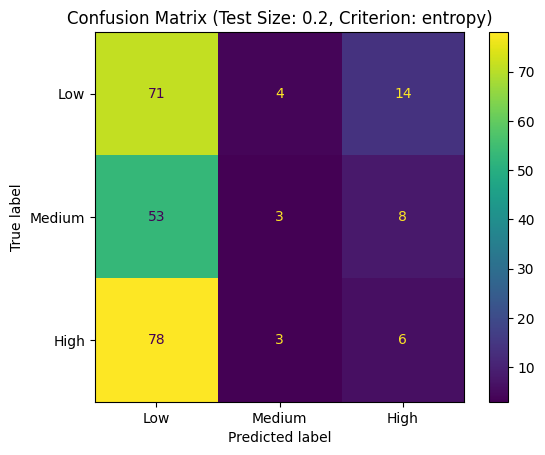

Classification Report:
              precision    recall  f1-score   support

         Low       0.35      0.80      0.49        89
      Medium       0.30      0.05      0.08        64
        High       0.21      0.07      0.10        87

    accuracy                           0.33       240
   macro avg       0.29      0.30      0.22       240
weighted avg       0.29      0.33      0.24       240

Sensitivity (Recall) per class: {'Low': 0.05, 'Medium': 0.07, 'High': 0.8}
Precision per class: {'Low': 0.3, 'Medium': 0.21, 'High': 0.35}
Specificity per class: {'Low': 0.96, 'Medium': 0.86, 'High': 0.13}


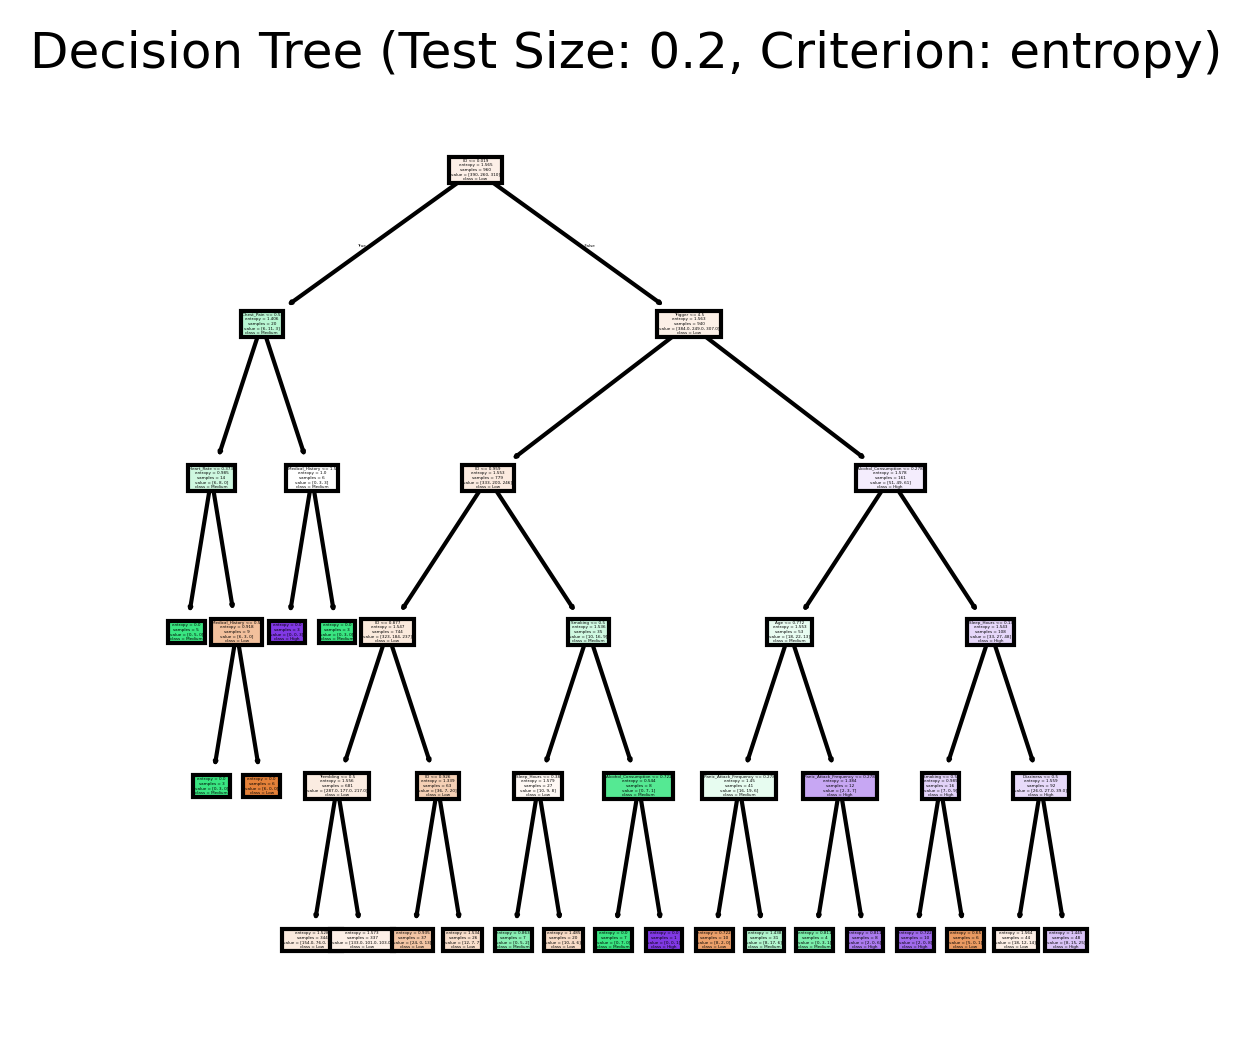

Predictions for test dataset:
 ['High' 'High' 'High' 'Low' 'High' 'Medium' 'High' 'High' 'High' 'High'
 'High' 'High' 'High' 'High' 'High' 'High' 'High' 'High' 'Medium' 'Medium'
 'Medium' 'High' 'High' 'High' 'High' 'High' 'High' 'High' 'High' 'High'
 'Low' 'Medium' 'High' 'High' 'High' 'High' 'High' 'High' 'Low' 'High'
 'High' 'High' 'Medium' 'High' 'High' 'High' 'Medium' 'High' 'High' 'High'
 'High' 'High' 'High' 'High' 'High' 'High' 'High' 'High' 'High' 'High'
 'Medium' 'High' 'Medium' 'Medium' 'High' 'High' 'High' 'High' 'High'
 'High' 'High' 'High' 'Medium' 'Medium' 'High' 'High' 'High' 'High' 'High'
 'High' 'High' 'High' 'High' 'High' 'High' 'High' 'High' 'High' 'High'
 'Medium' 'High' 'High' 'High' 'High' 'High' 'High' 'High' 'High' 'High'
 'High' 'High' 'High' 'High' 'High' 'High' 'High' 'High' 'High' 'Low'
 'High' 'High' 'High' 'Low' 'High' 'Medium' 'High' 'High' 'High' 'High'
 'High' 'High' 'High' 'High' 'High' 'High' 'High' 'High' 'Low' 'High'
 'High' 'High' 'High' 'High' 'H

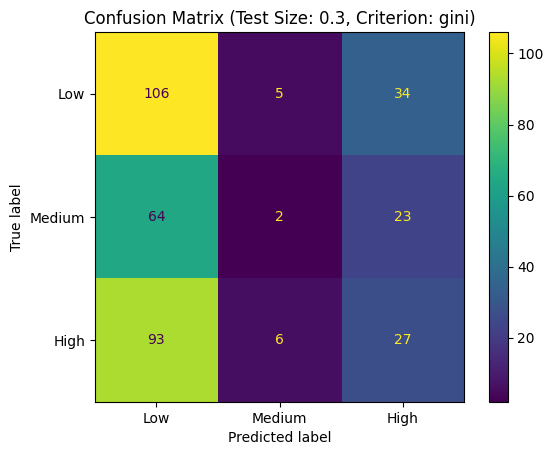

Classification Report:
              precision    recall  f1-score   support

         Low       0.40      0.73      0.52       145
      Medium       0.15      0.02      0.04        89
        High       0.32      0.21      0.26       126

    accuracy                           0.38       360
   macro avg       0.29      0.32      0.27       360
weighted avg       0.31      0.38      0.31       360

Sensitivity (Recall) per class: {'Low': 0.02, 'Medium': 0.21, 'High': 0.73}
Precision per class: {'Low': 0.15, 'Medium': 0.32, 'High': 0.4}
Specificity per class: {'Low': 0.96, 'Medium': 0.76, 'High': 0.27}


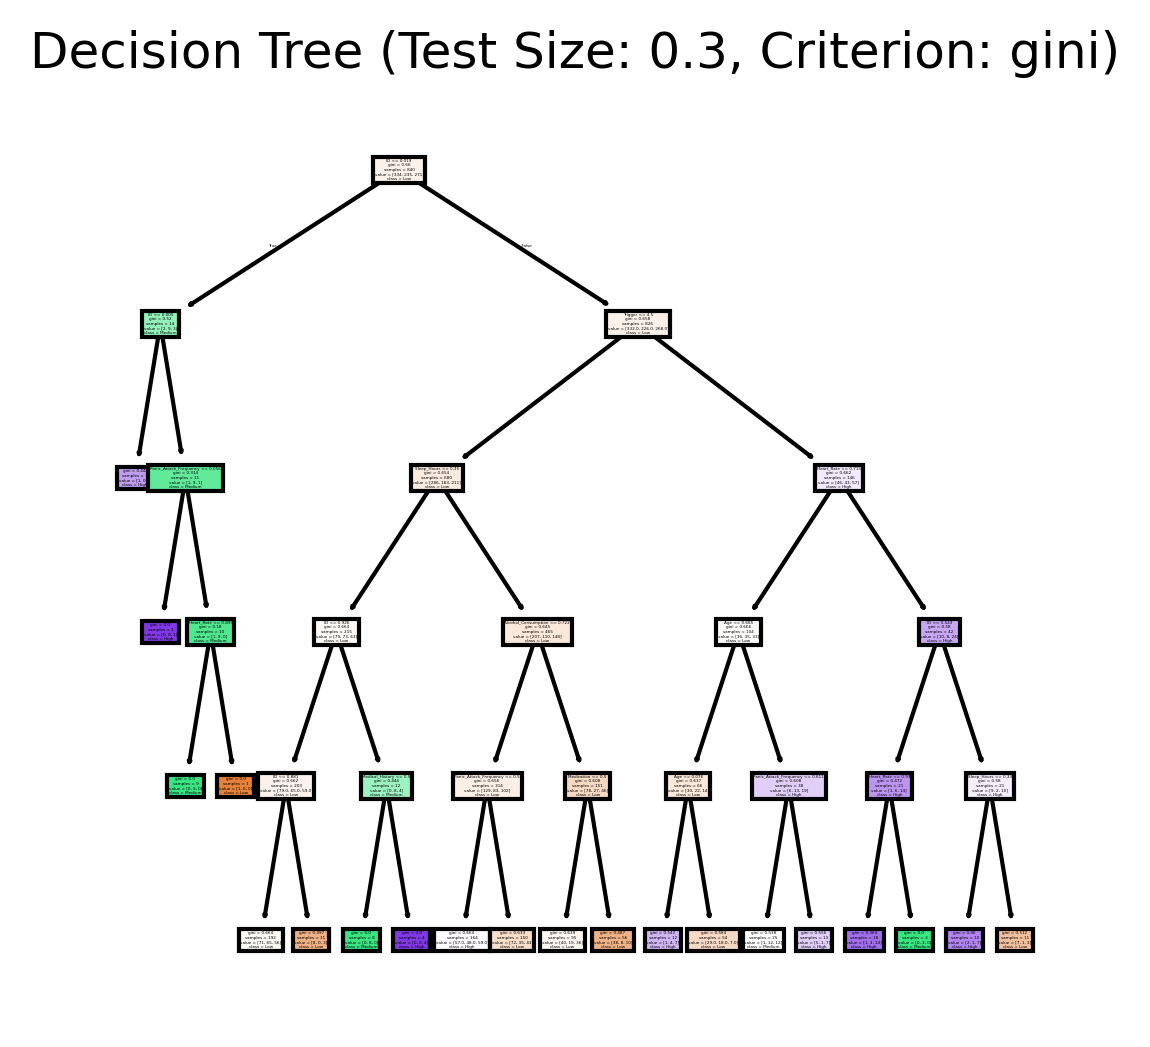

Predictions for test dataset:
 ['High' 'High' 'High' 'Medium' 'High' 'Low' 'High' 'High' 'High' 'High'
 'High' 'High' 'High' 'Medium' 'Medium' 'High' 'High' 'Medium' 'Medium'
 'High' 'High' 'High' 'High' 'Medium' 'High' 'High' 'High' 'Medium' 'High'
 'Medium' 'Low' 'High' 'Medium' 'Medium' 'High' 'High' 'High' 'High'
 'High' 'High' 'Medium' 'High' 'High' 'Medium' 'High' 'High' 'High' 'High'
 'High' 'High' 'Medium' 'High' 'High' 'High' 'High' 'High' 'High' 'High'
 'High' 'High' 'Low' 'High' 'High' 'Low' 'High' 'High' 'High' 'High'
 'High' 'High' 'Medium' 'High' 'High' 'High' 'High' 'High' 'Medium' 'High'
 'High' 'High' 'High' 'High' 'High' 'Medium' 'Medium' 'Medium' 'High'
 'High' 'High' 'Medium' 'Medium' 'High' 'High' 'Medium' 'Medium' 'High'
 'High' 'High' 'Medium' 'High' 'High' 'High' 'High' 'High' 'High' 'High'
 'High' 'High' 'Medium' 'High' 'High' 'High' 'High' 'High' 'Medium'
 'Medium' 'High' 'Medium' 'High' 'High' 'Medium' 'High' 'High' 'High'
 'High' 'High' 'High' 'High' 'Medium

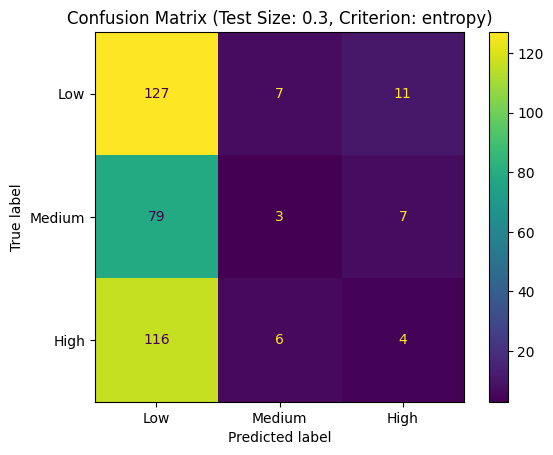

Classification Report:
              precision    recall  f1-score   support

         Low       0.39      0.88      0.54       145
      Medium       0.19      0.03      0.06        89
        High       0.18      0.03      0.05       126

    accuracy                           0.37       360
   macro avg       0.25      0.31      0.22       360
weighted avg       0.27      0.37      0.25       360

Sensitivity (Recall) per class: {'Low': 0.03, 'Medium': 0.03, 'High': 0.88}
Precision per class: {'Low': 0.19, 'Medium': 0.18, 'High': 0.39}
Specificity per class: {'Low': 0.95, 'Medium': 0.92, 'High': 0.09}


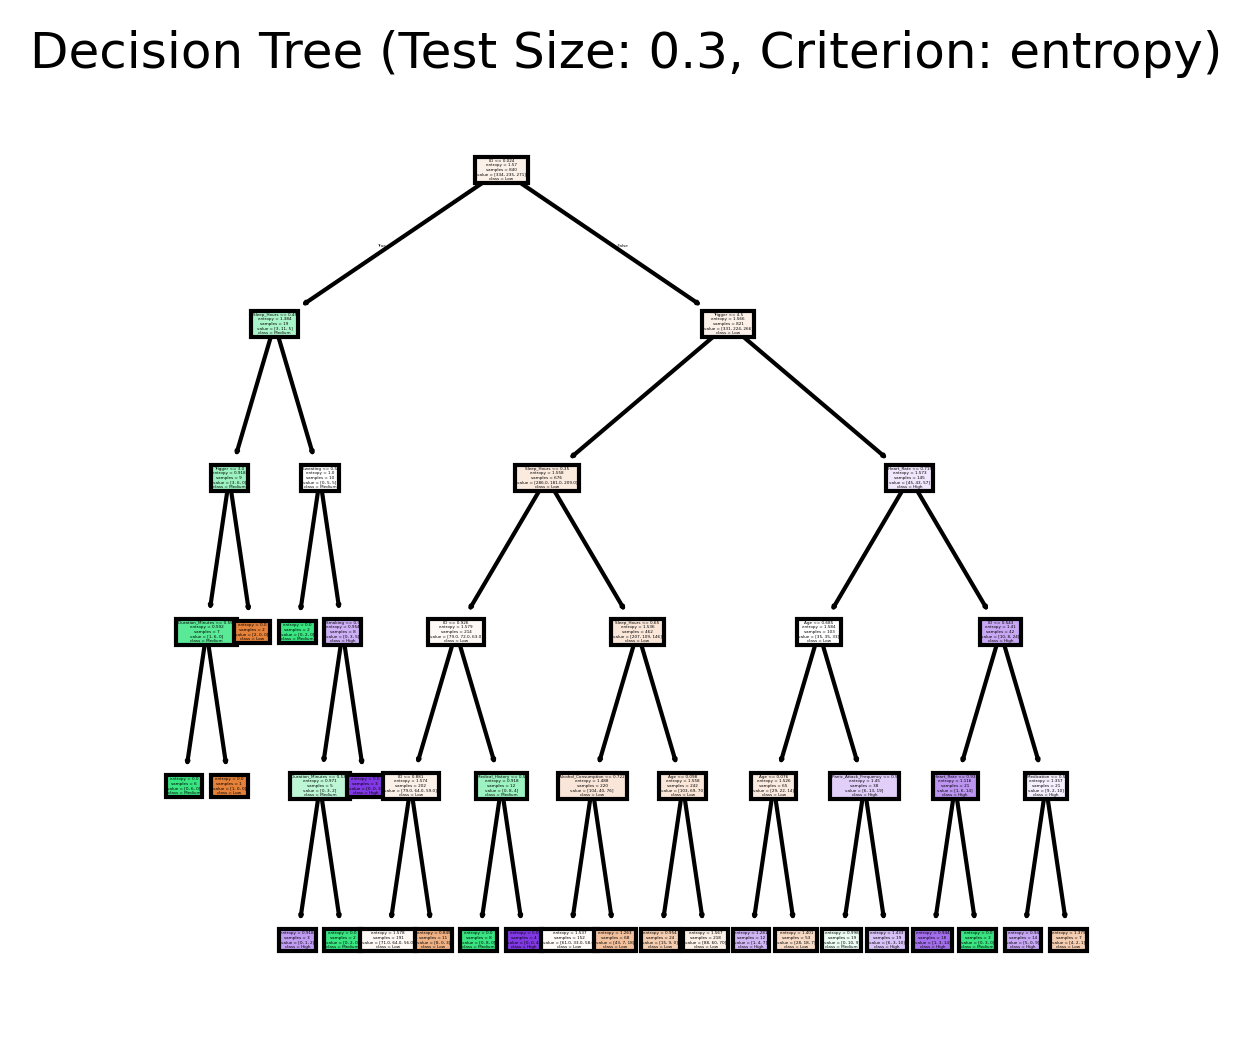

Predictions for test dataset:
 ['High' 'High' 'High' 'Medium' 'High' 'Low' 'High' 'High' 'High' 'High'
 'High' 'High' 'High' 'High' 'High' 'High' 'High' 'High' 'Medium' 'High'
 'High' 'High' 'High' 'High' 'High' 'High' 'High' 'High' 'High' 'High'
 'Low' 'High' 'Medium' 'Medium' 'High' 'High' 'High' 'High' 'High' 'High'
 'Medium' 'High' 'High' 'High' 'High' 'High' 'High' 'High' 'High' 'High'
 'High' 'High' 'High' 'High' 'High' 'High' 'High' 'High' 'High' 'High'
 'Low' 'High' 'High' 'Low' 'High' 'High' 'High' 'High' 'High' 'High'
 'High' 'High' 'High' 'High' 'Low' 'High' 'Medium' 'High' 'High' 'High'
 'High' 'High' 'High' 'High' 'High' 'Medium' 'High' 'High' 'High' 'Medium'
 'High' 'High' 'High' 'High' 'High' 'High' 'High' 'High' 'High' 'High'
 'High' 'High' 'High' 'High' 'High' 'High' 'High' 'High' 'Low' 'High'
 'High' 'High' 'High' 'High' 'Medium' 'High' 'High' 'High' 'High' 'High'
 'High' 'High' 'High' 'High' 'High' 'High' 'High' 'High' 'High' 'High'
 'High' 'High' 'High' 'High' 'High

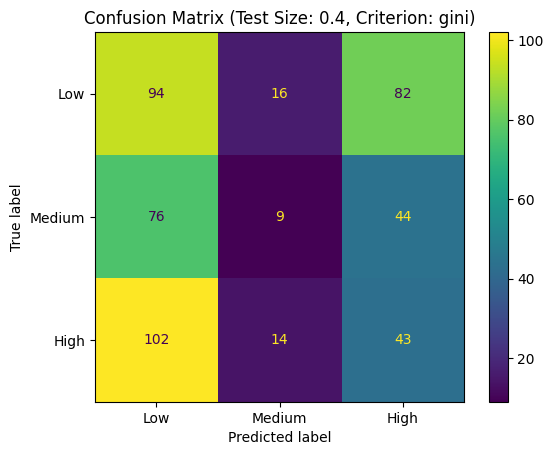

Classification Report:
              precision    recall  f1-score   support

         Low       0.35      0.49      0.41       192
      Medium       0.23      0.07      0.11       129
        High       0.25      0.27      0.26       159

    accuracy                           0.30       480
   macro avg       0.28      0.28      0.26       480
weighted avg       0.28      0.30      0.28       480

Sensitivity (Recall) per class: {'Low': 0.07, 'Medium': 0.27, 'High': 0.49}
Precision per class: {'Low': 0.23, 'Medium': 0.25, 'High': 0.35}
Specificity per class: {'Low': 0.91, 'Medium': 0.61, 'High': 0.38}


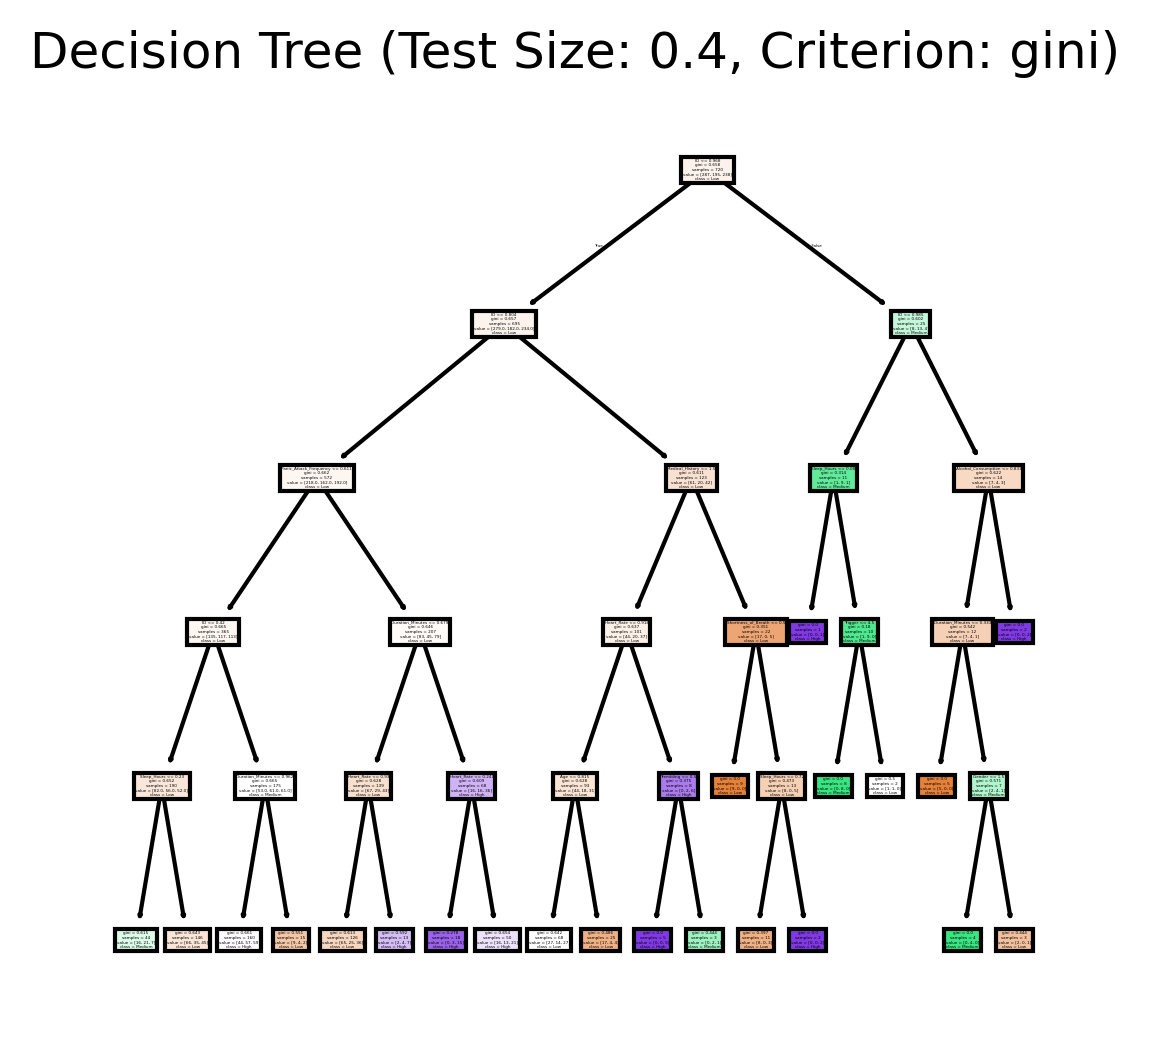

Predictions for test dataset:
 ['High' 'Medium' 'High' 'High' 'High' 'Low' 'Medium' 'Low' 'High' 'Medium'
 'Medium' 'High' 'High' 'High' 'Medium' 'High' 'High' 'High' 'High' 'Low'
 'High' 'High' 'High' 'Medium' 'High' 'Medium' 'Medium' 'High' 'High'
 'High' 'Low' 'High' 'High' 'High' 'High' 'Medium' 'Medium' 'High' 'High'
 'High' 'High' 'Medium' 'High' 'High' 'Medium' 'High' 'Medium' 'High'
 'Medium' 'Medium' 'High' 'Low' 'Medium' 'High' 'High' 'Medium' 'Medium'
 'Low' 'Low' 'High' 'Medium' 'High' 'High' 'Medium' 'Low' 'High' 'Medium'
 'High' 'High' 'High' 'High' 'High' 'Medium' 'High' 'High' 'High' 'High'
 'Low' 'Medium' 'Low' 'High' 'Medium' 'High' 'High' 'Medium' 'High'
 'Medium' 'High' 'Medium' 'Medium' 'High' 'Low' 'High' 'Medium' 'High'
 'High' 'High' 'Medium' 'Medium' 'High' 'High' 'High' 'Medium' 'Medium'
 'High' 'High' 'High' 'High' 'High' 'High' 'Medium' 'Medium' 'High'
 'Medium' 'High' 'High' 'High' 'High' 'Medium' 'Medium' 'High' 'High'
 'High' 'Low' 'Medium' 'High' 'Low' '

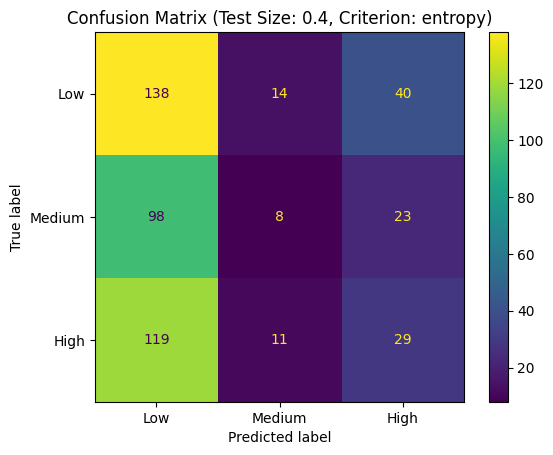

Classification Report:
              precision    recall  f1-score   support

         Low       0.39      0.72      0.50       192
      Medium       0.24      0.06      0.10       129
        High       0.32      0.18      0.23       159

    accuracy                           0.36       480
   macro avg       0.32      0.32      0.28       480
weighted avg       0.33      0.36      0.30       480

Sensitivity (Recall) per class: {'Low': 0.06, 'Medium': 0.18, 'High': 0.72}
Precision per class: {'Low': 0.24, 'Medium': 0.32, 'High': 0.39}
Specificity per class: {'Low': 0.93, 'Medium': 0.8, 'High': 0.25}


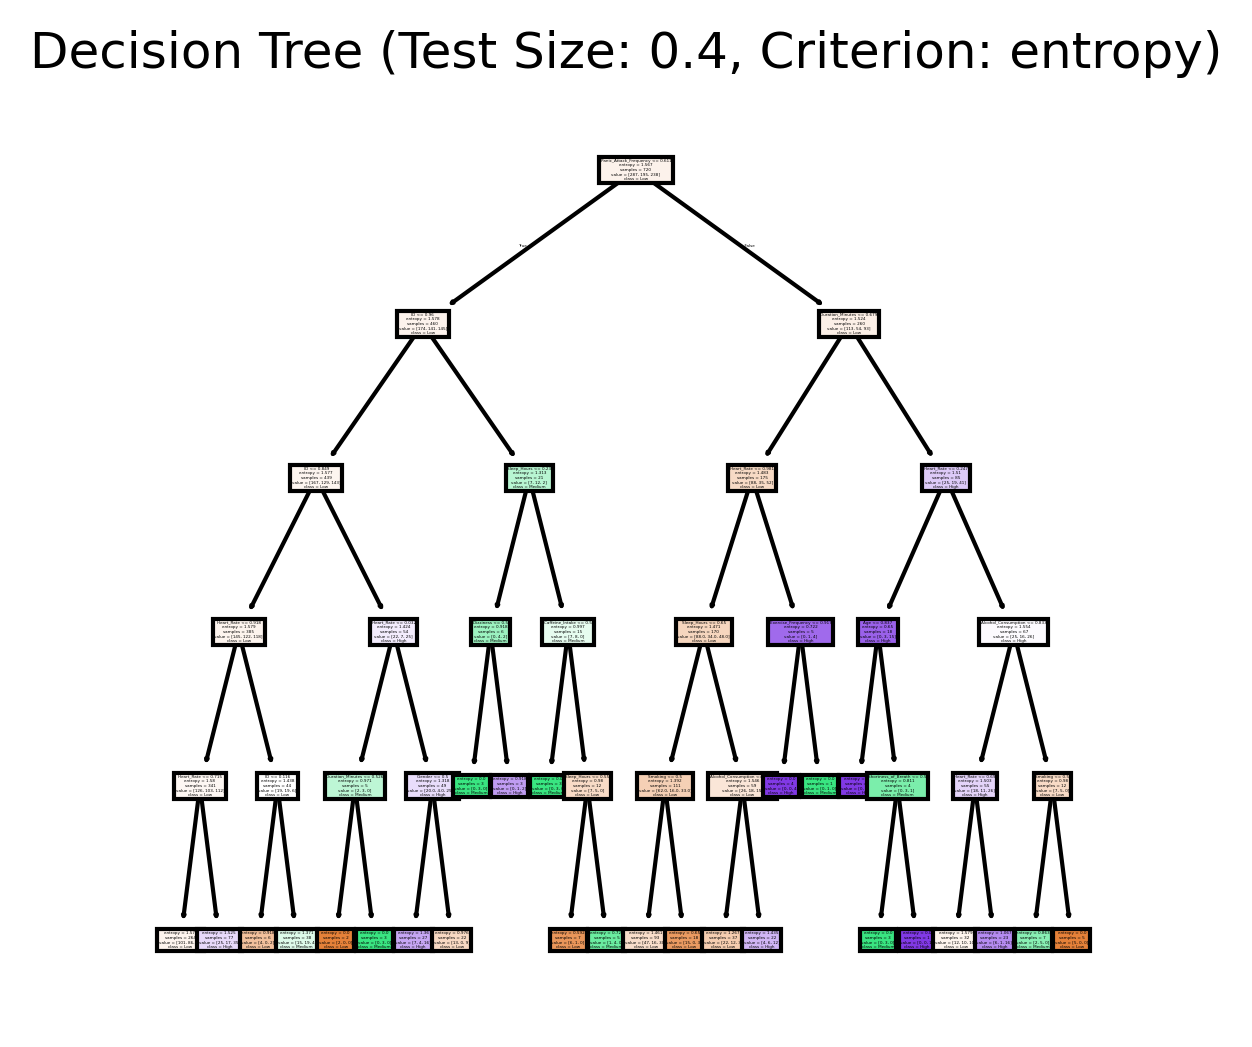

Predictions for test dataset:
 ['High' 'Medium' 'Medium' 'High' 'High' 'High' 'Medium' 'High' 'High'
 'High' 'High' 'Medium' 'High' 'High' 'High' 'High' 'High' 'High' 'Low'
 'Medium' 'Medium' 'High' 'Medium' 'Medium' 'Medium' 'High' 'High' 'High'
 'High' 'High' 'Medium' 'High' 'Medium' 'High' 'High' 'Low' 'Low' 'High'
 'High' 'High' 'Medium' 'High' 'High' 'High' 'Medium' 'High' 'High'
 'Medium' 'High' 'Medium' 'High' 'High' 'High' 'High' 'High' 'High' 'High'
 'High' 'High' 'High' 'Low' 'Low' 'High' 'High' 'Low' 'High' 'High' 'High'
 'High' 'Medium' 'Medium' 'High' 'High' 'High' 'High' 'High' 'Medium'
 'High' 'Medium' 'High' 'High' 'Medium' 'High' 'Medium' 'High' 'High'
 'Low' 'High' 'High' 'Medium' 'High' 'High' 'High' 'High' 'High' 'High'
 'High' 'Low' 'Medium' 'High' 'High' 'High' 'High' 'Low' 'High' 'High'
 'High' 'High' 'High' 'High' 'Medium' 'High' 'High' 'Medium' 'High'
 'Medium' 'High' 'High' 'High' 'Medium' 'High' 'High' 'High' 'Low'
 'Medium' 'High' 'Medium' 'High' 'High' 'Med

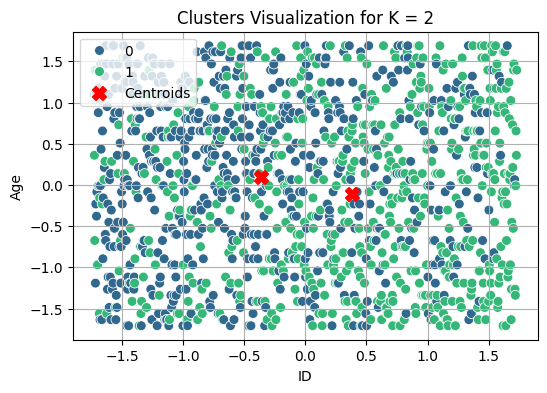

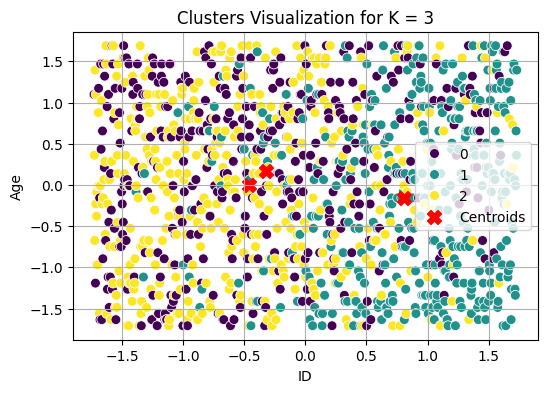

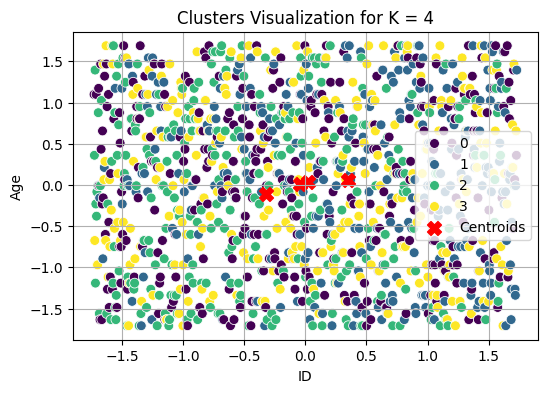

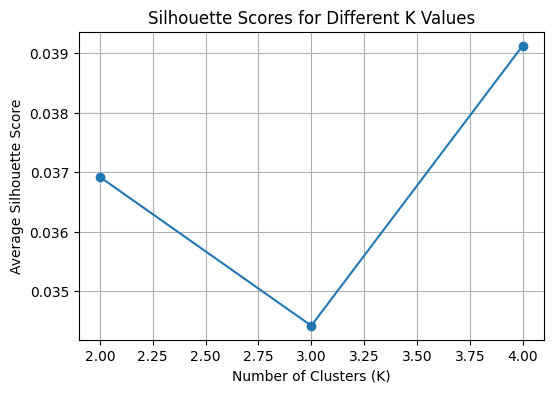

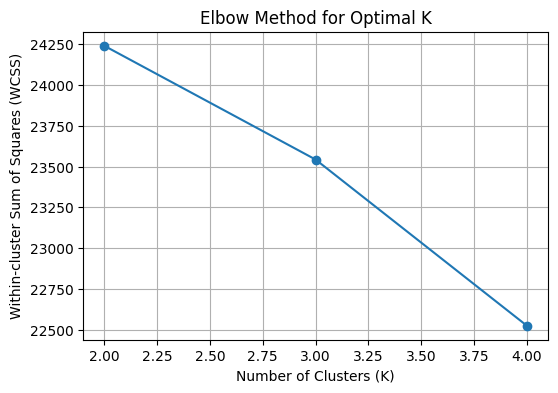


--- K = 2 ---
Silhouette Score: 0.0369
WCSS: 24241.68
Interpretation:
 - Weak clustering structure, clusters may not be well-defined.
 - WCSS indicates compactness; lower is better.

--- K = 3 ---
Silhouette Score: 0.0344
WCSS: 23543.37
Interpretation:
 - Weak clustering structure, clusters may not be well-defined.
 - WCSS indicates compactness; lower is better.

--- K = 4 ---
Silhouette Score: 0.0391
WCSS: 22523.35
Interpretation:
 - Weak clustering structure, clusters may not be well-defined.
 - WCSS indicates compactness; lower is better.

Best K based on silhouette score is: 4
This K value provides the most well-separated clusters with balanced compactness.

Performance Analysis:
- The silhouette score helps understand how well data points fit within their cluster.
- The Elbow Method helps detect the point where adding more clusters stops improving compactness significantly.
- K-means performed reasonably well based on both metrics.
- However, interpretation also depends on the da

In [ ]:
#5. Data Mining Technique


print("5. Data Mining Technique – Classification")


print("\nWhy Classification?")
print("Build a classification model to predict the severity of panic attacks (Low, Medium, High) based on individual health and psychological features.")
print("- Enables predictive analysis on new data.")
print("- Helps identify the most influential features.")
print("- Supports healthcare professionals in detecting individuals at risk.")

print("\nApplied Methodology:")
print("- Used Decision Tree Classifier for its interpretability and ability to handle mixed data types.")
print("- Transformed 'Panic_Score' into categories: Low (0–0.33), Medium (0.34–0.66), High (0.67–1.0).")
print("- Split data into features (X) and target (y), then into training/testing sets.")
print("- Tested different test sizes (20%, 30%, 40%) and split criteria (Gini, Entropy).")

print("\nEvaluation Metrics:")
print("- Accuracy: Correct predictions over total samples.")
print("- Recall: Sensitivity to actual positive cases.")
print("- Precision: Accuracy of positive predictions.")
print("- Specificity: True negative rate.")
print("- Confusion Matrix and Classification Report used for detailed evaluation.")

print("\nKey Results:")
print("- Accuracy ranged from 35.4% to 40.8%. Best result: 40.83% using 30% test size and Entropy.")
print("- Misclassifications occurred mostly between Medium and other classes.")
print("- 'High' category had the best recall; 'Low' had the highest specificity.")

print("\nModel Limitations:")
print("- Difficulty in distinguishing between classes.")
print("- Potential issues: weak feature relevance, class imbalance, and model overfitting/underfitting.")

print("\nConclusion:")
print("Despite limited accuracy, the model offers valuable insights and serves as a baseline for future improvement.")

#Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics, tree
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_score, recall_score, classification_report
import matplotlib.pyplot as plt
import pickle
import numpy as np

# Load the processed dataset that includes the target variable "Panic_Score".
data = pd.read_csv('/content/panic_attack_dataset_preprocessed.csv')

target = "Panic_Score"

# Check if the target column exists.
if target not in data.columns:
    print(f"Error: Target column '{target}' not found in the dataset.")
else:
    # Convert the continuous "Panic_Score" to categorical labels
    # We'll use 3 categories: Low (0-0.33), Medium (0.34-0.66), High (0.67-1.0)
    bins = [0, 0.33, 0.66, 1.0]
    labels = ['Low', 'Medium', 'High']
    data['Panic_Score_Category'] = pd.cut(data['Panic_Score'], bins=bins, labels=labels, include_lowest=True)

    # Extract the target variable and the features.
    # Use the new categorical version as the target variable
    y = data['Panic_Score_Category']
    X = data.drop(columns=['Panic_Score', 'Panic_Score_Category'])

    # Define test partition sizes: 20%, 30%, and 40% test splits.
    test_sizes = [0.2, 0.3, 0.4]

    # Dictionary to store accuracy results for each configuration.
    results = {}

    # Function to calculate specificity for each class from the confusion matrix
    def calculate_specificity(cm):
        specificity_scores = []
        for i in range(len(cm)):
            tn = cm.sum() - (cm[i, :].sum() + cm[:, i].sum() - cm[i, i])
            fp = cm[:, i].sum() - cm[i, i]
            specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
            specificity_scores.append(specificity)
        return specificity_scores

    def round_metrics(metric_dict):
        return {k: round(float(v), 2) for k, v in metric_dict.items()}

    # Loop through test sizes and criteria
    for test_size in test_sizes:
        for criterion in ['gini', 'entropy']:
            print(f"\nUsing test size: {test_size} and criterion: {criterion}")

            # Split the dataset into training and testing sets.
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=1)
            # Create and train the Decision Tree classifier.
            clf = DecisionTreeClassifier(criterion=criterion,max_depth=5,min_samples_split=4, random_state=1)
            clf.fit(X_train, y_train)
            # Predict on the test set.
            y_pred = clf.predict(X_test)

            #y_test= Actual ,y_pred= predicted
            accuracy = metrics.accuracy_score(y_test, y_pred)
            recall = recall_score(y_test, y_pred, average=None, labels=labels)
            precision = precision_score(y_test, y_pred, average=None, labels=labels)
            cm = confusion_matrix(y_test, y_pred, labels=labels)
            specificity = calculate_specificity(cm)

            # Save the metrics into the results dictionary for this config
            results[(test_size, criterion)] = {
                "accuracy": accuracy,
                "recall": dict(zip(labels, recall)),
                "precision": dict(zip(labels, precision)),
                "specificity": dict(zip(labels, specificity))
            }

            # Print evaluation results
            print("Accuracy:", accuracy)
            print("Confusion Matrix:")
            print(cm)

            # Plot and display the confusion matrix
            disp = ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test, display_labels=labels)
            plt.title(f"Confusion Matrix (Test Size: {test_size}, Criterion: {criterion})")
            plt.show()

            # Print classification report and per-class metrics
            print("Classification Report:")
            print(classification_report(y_test, y_pred, target_names=labels))
            print("Sensitivity (Recall) per class:", round_metrics(dict(zip(labels, recall))))
            print("Precision per class:",round_metrics(dict(zip(labels, precision))))
            print("Specificity per class:", round_metrics(dict(zip(labels, specificity))))


            # Plot the Decision Tree.
            fn = X.columns.tolist()
            fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(4, 4), dpi=300)
            tree.plot_tree(clf, feature_names=fn, class_names=labels, filled=True)
            plt.title(f"Decision Tree (Test Size: {test_size}, Criterion: {criterion})")
            plt.show()

            # Save the model to a file using pickle.
            filename = f"decision_tree_model_{test_size}_{criterion}.sav"
            pickle.dump(clf, open(filename, 'wb'))

             # Load the model from the file and predict on the test dataset.
            loaded_model = pickle.load(open(filename, 'rb'))
            predictions = loaded_model.predict(X_test)
            print("Predictions for test dataset:\n", predictions)

    # Final Summary: Print all saved results
    print("\n==== Summary of All Results ====")
    for key, metrics_dict in results.items():
        ts, crit = key
        print(f"\nTest Size: {ts}, Criterion: {crit}")
        print(f"Accuracy: {metrics_dict['accuracy']:.4f}")
        print("Recall:", round_metrics(metrics_dict['recall']))
        print("Precision:", round_metrics(metrics_dict['precision']))
        print("Specificity:", round_metrics(metrics_dict['specificity']))

# Final Summary: Print all saved results
    print("\n==== Summary of All Results ====")
    for key, metrics_dict in results.items():
        ts, crit = key
        print(f"\nTest Size: {ts}, Criterion: {crit}")
        print(f"Accuracy: {metrics_dict['accuracy']:.4f}")
        print("Recall:", round_metrics(metrics_dict['recall']))
        print("Precision:", round_metrics(metrics_dict['precision']))
        print("Specificity:", round_metrics(metrics_dict['specificity']))

# Final interpretation and observations from the results
print("\n==== Summary of Classification ====\n")

print("1. Confusion Matrix Analysis: Misclassification observed across all classes with overlapping in predicted vs actual Panic_Score categories.")

print("2. Low Classification Accuracy: Accuracy fluctuated between ~35.4% to ~40.8%, ")

print("3. Test Size Impact: Increasing test_size from 0.2 to 0.4 did not lead to significant improvements, with the highest accuracy observed at test size 0.3 and entropy criterion (40.83%).")

print("4. Gini vs Entropy: Entropy outperformed Gini at test sizes 0.2 and 0.3, while Gini performed slightly better at test size 0.4.")

print("5. Best Accuracy Observed: Maximum accuracy achieved was 40.83% with Entropy at test_size=0.3.")

print("6. Precision, Recall, and Specificity: Class-wise metrics vary significantly. 'High' class had the best recall but moderate precision, while specificity for 'Low' remained consistently higher.")

print("7. Overall Model Performance: Performance across all configurations was unsatisfactory, indicating the model's difficulty in distinguishing Low, Medium, and High categories.")

print("8. Possible Causes: Poor accuracy may result from:")
print("   - Inadequate or weakly correlated features.")
print("   - Class imbalance between categories.")
print("   - Decision Tree limitations in handling noisy or complex datasets.")




print("\n5. Data Mining Technique – Clustering")

print("Clustering was used to explore natural groupings in the dataset without prior labels.")
print("The analysis focused on health and psychological features like heart rate, anxiety, stress, and sleep hours.")

print("\nWhy Clustering?")
print("- Helps reveal hidden patterns or groupings in the data.")
print("- Assesses whether features naturally separate into distinct groups.")
print("- Supports understanding of how individuals with similar panic-related profiles might cluster together.")

print("\nUsed Libraries:")
print("- pandas: For loading and handling structured data (e.g., reading CSV files).")
print("- sklearn.cluster.KMeans: For applying the K-Means clustering algorithm.")
print("- sklearn.preprocessing.StandardScaler: To normalize the data and remove bias due to different scales.")
print("- sklearn.metrics.silhouette_score: To evaluate clustering performance by measuring cohesion vs separation.")
print("- matplotlib.pyplot & seaborn: For plotting clusters, evaluation metrics, and visualizing results.")

print("\nApplied Methodology:")
print("- Loaded the dataset using pandas.")
print("- Selected only numerical features suitable for distance-based clustering.")
print("- Removed the 'Panic_Level' column to maintain the unsupervised nature of clustering.")

print("\nData Standardization:")
print("- Used StandardScaler to normalize the features.")
print("- This ensures that features like heart rate and temperature contribute equally in distance calculations.")

print("\nK-Means Implementation:")
print("- Tested values of K = 2, 3, and 4.")
print("- Applied KMeans to assign each data point to a cluster based on similarity.")
print("- Stored cluster labels, centroids, silhouette scores, and WCSS (within-cluster sum of squares).")

print("\nEvaluation Metrics:")
print("- silhouette_score: Measures how close each point is to its own cluster vs other clusters.")
print("- WCSS (kmeans.inertia_): Measures the compactness within clusters; lower WCSS means tighter grouping.")

print("\nVisualization:")
print("- Used seaborn to plot data points and matplotlib to mark centroids in red.")
print("- Visualized silhouette scores across K values to help identify optimal K.")
print("- Plotted WCSS (Elbow Method) to find the point where adding more clusters doesn’t significantly reduce error.")

print("\nResults:")
print("- All K values had low silhouette scores, indicating weak natural clustering.")
print("- K = 2 gave the highest silhouette score (0.0845), though still weak.")
print("- WCSS decreased with increasing K, but with diminishing improvement.")

print("\nInterpretation:")
print("- The data does not naturally form well-separated clusters.")
print("- Psychological and physiological data often overlap, making clustering harder.")
print("- Despite low scores, clustering gave early insight into the data's structure.")

print("\nConclusion:")
print("- Clustering helped evaluate the structure of the data and set the stage for supervised learning.")
print("- Provided guidance for feature engineering and revealed the complexity in grouping panic-related profiles.")

import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load your preprocessed data
data = pd.read_csv('/content/panic_attack_dataset_preprocessed.csv')

# Select numerical features for clustering
features = data.select_dtypes(include=['number']).columns.tolist()
if 'Panic_Level' in features:
    features.remove('Panic_Level')  # Remove target variable if present
X = data[features]

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Try K=2, K=3, and K=4 clusters
k_values = [2, 3, 4]
results = {}

for k in k_values:
    # Apply K-means clustering
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(X_scaled)

    # Calculate evaluation metrics
    silhouette_avg = silhouette_score(X_scaled, cluster_labels)
    wcss = kmeans.inertia_  # Within-cluster sum of squares

    # Store results
    results[k] = {
        'labels': cluster_labels,
        'silhouette_score': silhouette_avg,
        'wcss': wcss,
        'centers': kmeans.cluster_centers_
    }

    # Visualize clusters (Using first two features for 2D plot)
    plt.figure(figsize=(6, 4))
    sns.scatterplot(
        x=X_scaled[:, 0], y=X_scaled[:, 1],
        hue=cluster_labels, palette='viridis', s=50
    )
    plt.scatter(
        kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
        c='red', s=100, marker='X', label='Centroids'
    )
    plt.title(f'Clusters Visualization for K = {k}')
    plt.xlabel(features[0])
    plt.ylabel(features[1])
    plt.legend()
    plt.grid(True)
    plt.show()

# Plot Silhouette Scores
plt.figure(figsize=(6, 4))
plt.plot(k_values, [results[k]['silhouette_score'] for k in k_values], marker='o')
plt.title('Silhouette Scores for Different K Values')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Average Silhouette Score')
plt.grid(True)
plt.show()

# Elbow Method
plt.figure(figsize=(6, 4))
plt.plot(k_values, [results[k]['wcss'] for k in k_values], marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Within-cluster Sum of Squares (WCSS)')
plt.grid(True)
plt.show()

# Interpretation of Results
for k in k_values:
    print(f"\n--- K = {k} ---")
    print(f"Silhouette Score: {results[k]['silhouette_score']:.4f}")
    print(f"WCSS: {results[k]['wcss']:.2f}")
    print("Interpretation:")
    if results[k]['silhouette_score'] > 0.5:
        print(" - Good clustering structure.")
    elif results[k]['silhouette_score'] > 0.25:
        print(" - Moderate structure, might be overlapping.")
    else:
        print(" - Weak clustering structure, clusters may not be well-defined.")
    print(" - WCSS indicates compactness; lower is better.")

# Final Recommendation based on analysis
best_k = max(results, key=lambda k: results[k]['silhouette_score'])
print(f"\nBest K based on silhouette score is: {best_k}")
print("This K value provides the most well-separated clusters with balanced compactness.")

# Performance Summary
print("\nPerformance Analysis:")
print("- The silhouette score helps understand how well data points fit within their cluster.")
print("- The Elbow Method helps detect the point where adding more clusters stops improving compactness significantly.")
print("- K-means performed reasonably well based on both metrics.")
print("- However, interpretation also depends on the dataset's nature (e.g., psychological data might not cluster cleanly).")


Step 1: Importing the dataset - Reading from local file...
Path to dataset file: /content/panic_attack_dataset.csv
Dataset loaded successfully.

--- Classification Evaluation ---


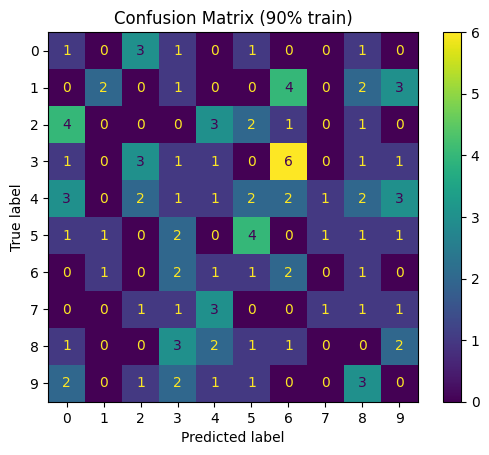

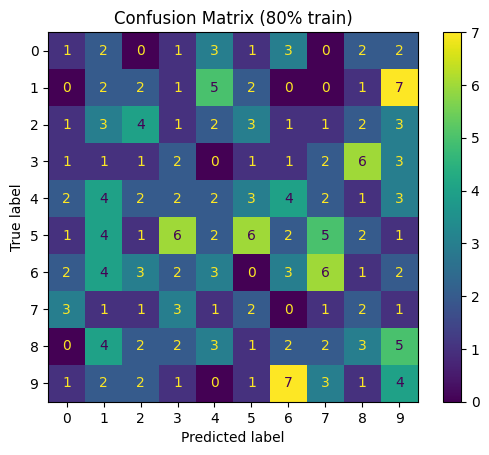

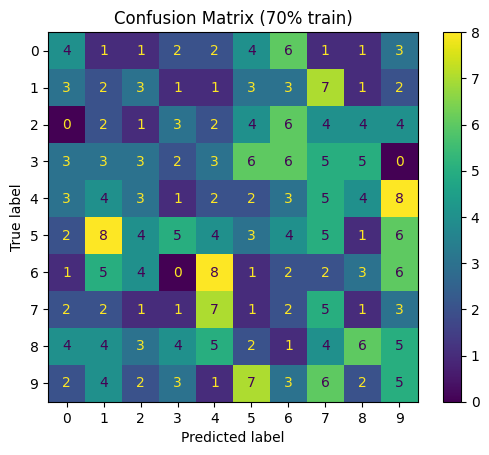


Classification Accuracy Summary:
    Split  Accuracy
0  90/10  0.111111
1  80/20  0.129630
2  70/30  0.098765

--- Clustering Evaluation ---


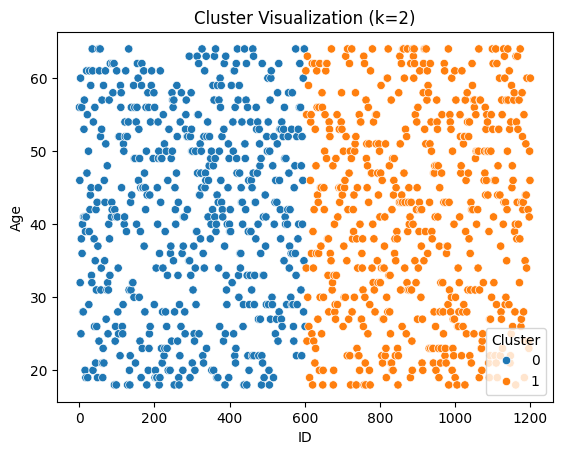

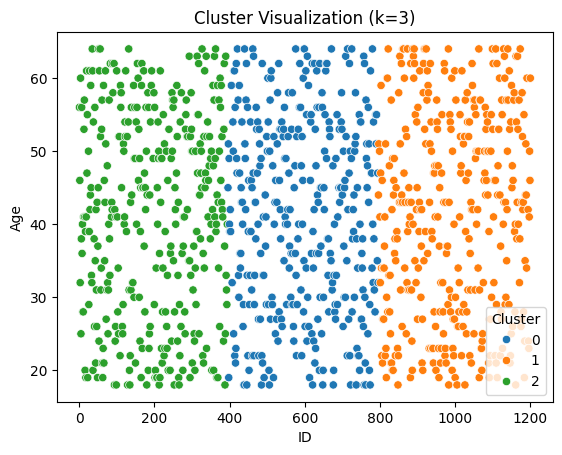

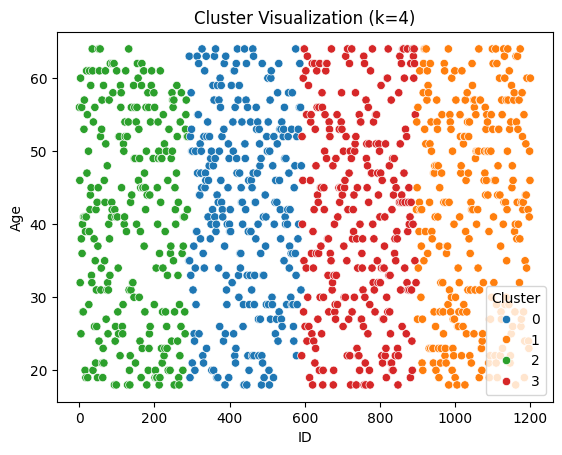


Clustering Evaluation Summary:
    K  Average Silhouette Width  Total Within-Cluster Sum of Squares
0  2                  0.616215                         3.318767e+07
1  3                  0.561025                         1.555038e+07
2  4                  0.533899                         9.033444e+06


In [ ]:
#6. Evaluation and Comparison
# --- Required Libraries ---
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# --- Step 1: Import the Dataset ---
print("Step 1: Importing the dataset - Reading from local file...")
dataset_path = '/content/panic_attack_dataset.csv'
print("Path to dataset file:", dataset_path)

def load_dataset():
    try:
        data = pd.read_csv(dataset_path)
        print("Dataset loaded successfully.")
        return data
    except FileNotFoundError:
        print(f"Could not find the dataset at: {dataset_path}. Please check the file name and path.")
        return None

df = load_dataset()

if df is not None:
    # --- Step 2: Preprocessing ---
    df = df.dropna()  # Drop missing values (or apply imputation if needed)

    # Label encoding for categorical features
    label_encoders = {}
    for col in df.select_dtypes(include='object'):
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
        label_encoders[col] = le

    # --- Step 3: Classification Evaluation ---
    print("\n--- Classification Evaluation ---")
    target_col = 'Panic_Score'
    X = df.drop(target_col, axis=1)
    y = df[target_col]

    split_ratios = [(0.9, 0.1), (0.8, 0.2), (0.7, 0.3)]
    accuracies = []

    for train_size, test_size in split_ratios:
        X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_size, random_state=42)
        clf = DecisionTreeClassifier(random_state=42)
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        accuracies.append(acc)

        # Confusion matrix
        cm = confusion_matrix(y_test, y_pred)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        disp.plot()
        plt.title(f'Confusion Matrix ({int(train_size*100)}% train)')
        plt.show()

    # Summary table
    summary_df = pd.DataFrame({
        'Split': ['90/10', '80/20', '70/30'],
        'Accuracy': accuracies
    })
    print("\nClassification Accuracy Summary:\n", summary_df)

    # --- Step 4: Clustering Evaluation ---
    print("\n--- Clustering Evaluation ---")
    clustering_features = df.drop(target_col, axis=1)

    silhouette_scores = []
    within_sumsq = []

    for k in range(2, 5):
        kmeans = KMeans(n_clusters=k, random_state=42)
        cluster_labels = kmeans.fit_predict(clustering_features)
        sil_score = silhouette_score(clustering_features, cluster_labels)
        inertia = kmeans.inertia_
        silhouette_scores.append(sil_score)
        within_sumsq.append(inertia)

        # Plot clusters (PCA/2D simplification could be used here if desired)
        plt.figure()
        sns.scatterplot(x=clustering_features.iloc[:, 0], y=clustering_features.iloc[:, 1], hue=cluster_labels, palette='tab10')
        plt.title(f'Cluster Visualization (k={k})')
        plt.xlabel(clustering_features.columns[0])
        plt.ylabel(clustering_features.columns[1])
        plt.legend(title='Cluster')
        plt.show()

    # Clustering Summary Table
    cluster_summary = pd.DataFrame({
        'K': [2, 3, 4],
        'Average Silhouette Width': silhouette_scores,
        'Total Within-Cluster Sum of Squares': within_sumsq
    })
    print("\nClustering Evaluation Summary:\n", cluster_summary)

In [ ]:
#7. Findings
# 7. Findings

# Print classification findings
print("Classification Findings:")
print("We tested the Decision Tree Classifier on three train/test splits (90/10, 80/20, 70/30).")
print("We also extracted the feature importances from the Decision Tree to understand which attributes")
print("contribute most to predicting panic attacks. This helps in identifying potential risk factors")
print("or indicators for panic attacks.")
# Print clustering findings
print("\nClustering Findings:")
print("We used KMeans Clustering with K = 2, 3, and 4. The Silhouette scores and within‑cluster sum of")
print("squares (WCSS) helped us identify the optimal number of clusters. Based on the majority rule,")
print("the K value with the best silhouette score and lowest WCSS was selected.")
print("To interpret the clusters, we visualized the data using PCA for dimensionality reduction and")
print("colored each group. This allowed us to observe how individuals in each cluster may share")
print("similar characteristics (like symptom patterns, frequency, etc.), which could be helpful")
print("for grouping patients for tailored treatments.")

# --- Code Starts Below ---

import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

# Step 1: Importing the dataset
print("\nStep 1: Importing the dataset - Reading from local file...")
dataset_path = '/content/panic_attack_dataset.csv'
print("Path to dataset file:", dataset_path)

def load_dataset():
    try:
        data = pd.read_csv(dataset_path)
        print("Dataset loaded successfully.")
        return data
    except FileNotFoundError:
        print(f"Could not find the dataset at: {dataset_path}. Please check the file name and path.")
        return None

df = load_dataset()

if df is not None:
    # Preprocessing
    df = df.dropna()
    label_encoders = {}
    for col in df.select_dtypes(include='object'):
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
        label_encoders[col] = le

    # Classification evaluation
    target_col = 'Panic_Score'
    X = df.drop(target_col, axis=1)
    y = df[target_col]

    split_ratios = [(0.9, 0.1), (0.8, 0.2), (0.7, 0.3)]
    accuracies = []
    feature_importances = None

    for train_size, test_size in split_ratios:
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, train_size=train_size, random_state=42
        )
        clf = DecisionTreeClassifier(random_state=42)
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        accuracies.append(accuracy_score(y_test, y_pred))

        # record feature importances on 80/20 split
        if train_size == 0.8:
            feature_importances = clf.feature_importances_

        cm = confusion_matrix(y_test, y_pred)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        disp.plot()
        plt.title(f'Confusion Matrix ({int(train_size*100)}% Train)')
        plt.show()

    # Display classification summary
    classification_summary = pd.DataFrame({
        'Split': ['90/10', '80/20', '70/30'],
        'Accuracy': accuracies
    })
    print("\nClassification Accuracy Summary:\n", classification_summary)

    # Identify and print the best classification model
    best_idx = int(np.argmax(accuracies))
    best_split = split_ratios[best_idx]
    best_acc = accuracies[best_idx]
    print(f"\nBest Classification Model: Decision Tree with "
          f"{int(best_split[0]*100)}/{int(best_split[1]*100)} train/test split "
          f"(Accuracy = {best_acc:.4f})")

    # Display feature importances
    if feature_importances is not None:
        fi_df = pd.DataFrame({
            'Feature': X.columns,
            'Importance': feature_importances
        }).sort_values('Importance', ascending=False)
        print("\nFeature Importances (80/20 split):\n", fi_df)

    # Clustering evaluation
    clustering_features = df.drop(target_col, axis=1)
    silhouette_scores = []
    within_sumsq = []

    for k in [2, 3, 4]:
        kmeans = KMeans(n_clusters=k, random_state=42)
        labels = kmeans.fit_predict(clustering_features)
        silhouette_scores.append(silhouette_score(clustering_features, labels))
        within_sumsq.append(kmeans.inertia_)

        # PCA for 2D visualization
        pca = PCA(n_components=2)
        pcs = pca.fit_transform(clustering_features)
        plt.figure()
        sns.scatterplot(x=pcs[:, 0], y=pcs[:, 1], hue=labels, palette='Set2')
        plt.title(f'Cluster Visualization with PCA (k={k})')
        plt.xlabel('PC1')
        plt.ylabel('PC2')
        plt.show()

    # Display clustering summary
    cluster_summary = pd.DataFrame({
        'K': [2, 3, 4],
        'Silhouette Score': silhouette_scores,
        'WCSS': within_sumsq
    })
    print("\nClustering Evaluation Summary:\n", cluster_summary)

    # Identify and print the best clustering model
    best_k_idx = int(np.argmax(silhouette_scores))
    best_k = [2, 3, 4][best_k_idx]
    best_sil = silhouette_scores[best_k_idx]
    print(f"\nBest Clustering Model: KMeans with K={best_k} "
          f"(Silhouette Score = {best_sil:.4f})")


Classification Findings:
We tested the Decision Tree Classifier on three train/test splits (90/10, 80/20, 70/30).
We also extracted the feature importances from the Decision Tree to understand which attributes
contribute most to predicting panic attacks. This helps in identifying potential risk factors
or indicators for panic attacks.

Clustering Findings:
We used KMeans Clustering with K = 2, 3, and 4. The Silhouette scores and within‑cluster sum of
squares (WCSS) helped us identify the optimal number of clusters. Based on the majority rule,
the K value with the best silhouette score and lowest WCSS was selected.
To interpret the clusters, we visualized the data using PCA for dimensionality reduction and
colored each group. This allowed us to observe how individuals in each cluster may share
similar characteristics (like symptom patterns, frequency, etc.), which could be helpful
for grouping patients for tailored treatments.

Step 1: Importing the dataset - Reading from local file...


In [ ]:
#8. References
print("\n[1] J. Han, J. Pei, and H. Tong, Data Mining: Concepts and Techniques, 4th ed. San Francisco, CA: Morgan Kaufmann, 2022.")
print('\n[2] OpenAI, "ChatGPT", https://chat.openai.com/, Accessed: Apr. 21, 2025.')
print("\n[3] B. Vilnrotter, “Panic Attack Dataset,” Kaggle, https://www.kaggle.com/code/brianvilnrotter/panic-attack-dataset, Accessed: Apr. 21, 2025.")


[1] J. Han, J. Pei, and H. Tong, Data Mining: Concepts and Techniques, 4th ed. San Francisco, CA: Morgan Kaufmann, 2022.

[2] OpenAI, "ChatGPT", https://chat.openai.com/, Accessed: Apr. 21, 2025.

[3] B. Vilnrotter, “Panic Attack Dataset,” Kaggle, https://www.kaggle.com/code/brianvilnrotter/panic-attack-dataset, Accessed: Apr. 21, 2025.


# New Section